# Linear Regression
Cenying (Tracy) Yang (cenying.yang@cityu.edu.hk)

Department of Information Systems

City University of Hong Kong

## 1. Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# import airbnb data
airbnb = pd.read_csv('airbnb.csv')

In [ ]:
# print out the first 5 rows of the data
# DescLen = decription lenth,多少个characters；Dist = distance
print(airbnb.head())

   NameLen               Style  Price  Cancellation  Stars  Reviews  \
0       43  entire condominium    154             0    4.5        2   
1       44        entire house    110             0    5.0       28   
2       50         entire loft     74             1    4.5        2   
3       33   entire guesthouse    135             0    5.0       12   
4       15  entire condominium     90             1    4.5       18   

   Superhost  Guests  Bedrooms  Beds  Baths  DescLen  Amenities  Latitude  \
0          0       4         2     3    2.0      340         12  35.68795   
1          1       4         2     2    1.0      492         42  35.68669   
2          0       2         1     1    1.0      460         15  35.67155   
3          1       2         1     1    1.0      404         35  35.69268   
4          0       2         1     1    1.0      368          7  35.68672   

   Longitude  PlazaDist  CanyonRdDist  CapitolDist  OperaDist  AirportDist  
0 -105.93688   0.119008      0.77

count     99.000000
mean     170.050505
std      110.452444
min       35.000000
25%      101.500000
50%      131.000000
75%      199.000000
max      744.000000
Name: Price, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c0dbe8130>]],
      dtype=object)

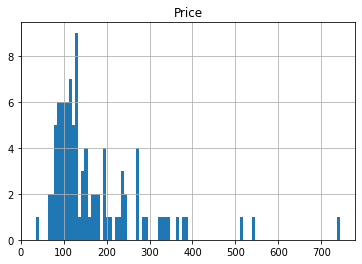

In [ ]:
# check the summary statistics and the distribution of the variable Price
print(airbnb['Price'].describe())
airbnb.hist('Price', bins = 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c17e6fb20>]],
      dtype=object)

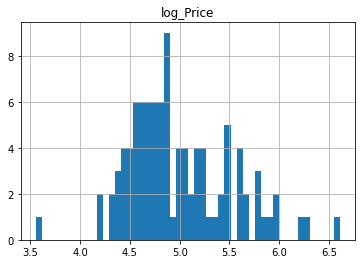

In [ ]:
# since the distribution is right skewed, we need to take log transformation of the variable
airbnb['log_Price'] = np.log(airbnb['Price'])
airbnb.hist('log_Price', bins = 50)

airbnb['log_Price'] = np.log(airbnb['Price']) 

将 airbnb 数据帧对象中的 Price 列的每个元素取对数后存储到一个新的 log_Price 列中，这里使用了 NumPy 中的 log 函数。


airbnb.hist('log_Price', bins = 50) 

将 airbnb 数据帧对象中的 log_Price 列绘制成一个直方图，其中 bins = 50 指定了直方图的条数为 50。这里使用了 Pandas 中的 hist 函数。由于 log_Price 的值已经是对数值，因此绘制的直方图显示的是对数值的分布情况。

In [ ]:
# average log price for superhost vs non superhost
group_by_superhost = airbnb.groupby('Superhost')['log_Price'].mean()
print(group_by_superhost)

Superhost
0    5.115792
1    4.892377
Name: log_Price, dtype: float64


airbnb.groupby('Superhost')['log_Price'].mean() 

将 airbnb 数据帧对象按照 Superhost 列进行分组，对每个分组计算 log_Price 列的平均值。具体来说，它返回一个 Pandas 序列对象，序列的索引为 Superhost 列中的两个不同值，即 '0' 和 '1'，而序列的值为相应分组的 log_Price 列的平均值。

In [ ]:
# average log price for different # of bedrooms；#: numbers
group_by_bedroom = airbnb.groupby('Bedrooms')['log_Price'].mean()
print(group_by_bedroom)

Bedrooms
0    4.670109
1    4.794342
2    5.346705
3    5.712909
4    6.612041
Name: log_Price, dtype: float64


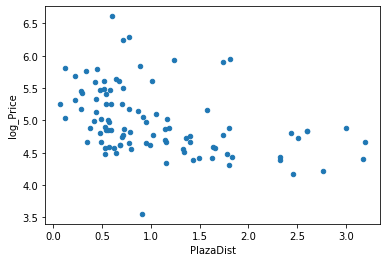

In [ ]:
# Check correlation between log price and distance to plaza  检查log price与到广场距离之间的相关性
# a scatter plot of log price and distance to plaza
airbnb.plot.scatter(x = 'PlazaDist', y = 'log_Price')

将 airbnb 数据帧对象的 PlazaDist 列作为 x 轴，log_Price 列作为 y 轴，绘制散点图。在该散点图中，每个数据点代表一个 AirBnb 房源，其横坐标为该房源距离市中心的距离，纵坐标为该房源的价格取对数后的值。该图可以用来探究价格与距离市中心的关系。

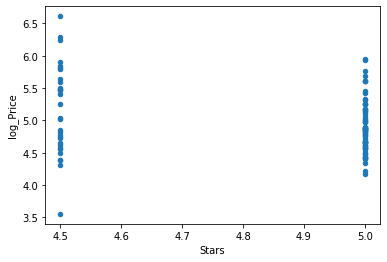

In [ ]:
# Check correlation between log price and review stars
# a scatter plot of log price and stars
airbnb.plot.scatter(x = 'Stars', y = 'log_Price')

将 airbnb 数据帧对象的 Stars 列作为 x 轴，log_Price 列作为 y 轴，绘制散点图。在该散点图中，每个数据点代表一个 AirBnb 房源，其横坐标为该房源的星级评分，纵坐标为该房源的价格取对数后的值。该图可以用来探究价格与房源质量（即星级评分）的关系。

## 2. Linear regression

#### scikit-learn (also known as sklearn) is a library featuring various classification, regression and clustering algorithms including linear regression, decision tree, k-means, etc.
scikit-learn（也称为SKlearn）是一个具有各种分类，回归和聚类算法的库，包括线性回归，决策树，K-means等。

In [ ]:
from sklearn import metrics, linear_model, model_selection

In [ ]:
# check column names 返回airbnb数据帧对象的列名列表，即所有列的名称。这个列表包含所有列名的字符串，并按它们在数据帧对象中的顺序排序。
airbnb.columns.values

array(['NameLen', 'Style', 'Price', 'Cancellation', 'Stars', 'Reviews',
       'Superhost', 'Guests', 'Bedrooms', 'Beds', 'Baths', 'DescLen',
       'Amenities', 'Latitude', 'Longitude', 'PlazaDist', 'CanyonRdDist',
       'CapitolDist', 'OperaDist', 'AirportDist', 'log_Price'],
      dtype=object)

In [ ]:
# prepare X and y；.value以列表返回字典中的所有值
X = airbnb[['NameLen','Cancellation', 'Stars', 'Reviews','Superhost', 'Guests', 'Bedrooms', 'Beds', 'Baths', 'DescLen',
           'Amenities', 'PlazaDist', 'CanyonRdDist','CapitolDist', 'OperaDist', 'AirportDist']].values
y = airbnb['log_Price'].values
print(X.shape)
print(y.shape)

(99, 16)
(99,)


这段代码中，我们从 airbnb 数据帧对象中选择了一些列，并把它们的值赋给变量 X。我们同时选择了 log_Price 列的值，把它们赋给了变量 y。

具体来说，X 是一个 NumPy 数组，它包含了 airbnb 数据帧对象中的以下列：

NameLen: 房源名称的长度。Cancellation: 取消预订的政策。Stars: 房源的评级。

Reviews: 房源的评论数。Superhost: 该属性表示房东是否是超级房东。Guests: 可以容纳多少位客人。

Bedrooms: 有多少卧室。Beds: 有多少张床。Baths: 表示有多少间浴室。DescLen: 房源描述的长度。

Amenities: 房源提供的设施和服务。PlazaDist:离普拉萨区（Plaza District）的距离。 

CanyonRdDist: 峡谷路（Canyon Road）的距离 CapitolDist: 国会大厦（New Mexico State Capitol）

OperaDist: 圣菲歌剧院（Santa Fe Opera） AirportDist: Santa Fe Municipal Airport

同时，y 是一个 NumPy 数组，它包含了 log_Price 列的值。log_Price 是房源价格的对数，因此 y 中包含了所有房源的对数价格。

X 的形状是 (n, 16)，其中 n 是样本数量；y 的形状是 (n,)。这意味着我们有 n 个样本，每个样本有 16 个属性和一个价格。

In [ ]:
# split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.2, random_state=42) 
# test_size=0.2其实和train_size=0.8一样
# random_state可以被随便设置，正整数，但最好每次都是一样的数字，这样得到的是一样的结果，保证程序reproduceable（可复写的）

print('Training size: ', y_train.shape)
print('Testing size: ', y_test.shape)

Training size:  (79,)
Testing size:  (20,)


使用scikit-learn库中的model_selection模块中的train_test_split函数将数据划分为训练集和测试集。

X和y变量分别表示特征和目标变量。test_size参数被设置为0.2，这意味着20％的数据将被用作测试集。

random_state参数42，这个数字可以随便设置为正整数，但最好每次都一样，以确保结果可以被复现


print两行代码用于打印训练集和测试集的大小，即它们包含多少条记录。y_train.shape和y_test.shape可以获取相应数组的形状，即每个数组中的记录数和特征数。

输出是一个值是因为 y_train.shape 和 y_test.shape 返回的是一个包含一个整数的元组（tuple），而元组只有一个元素时，需要在元素后面添加逗号来表示这是一个元组。因此，打印的结果中逗号后面是空的。

例如，(79,) 表示一个只包含一个整数 79 的元组，而 (20,) 表示一个只包含一个整数 20 的元组。如果逗号被省略，则会将 y_train.shape 和 y_test.shape 视为整数而不是元组。

In [ ]:
# run linear regression
linreg = linear_model.LinearRegression()
linreg_fit = linreg.fit(X_train, y_train)
#fit function

这两行代码创建了一个名为 linreg 的线性回归模型，并用训练集 X_train 和目标变量 y_train 对其进行训练（即拟合数据）。

这里使用了 scikit-learn 中的 linear_model 模块，其中的 LinearRegression() 函数创建了一个线性回归模型对象，可以通过这个对象来访问模型的各种属性和方法。

第二行代码用训练集 X_train 和目标变量 y_train 对线性回归模型进行训练，得到模型 linreg_fit

使用 fit() 方法拟合模型。fit() 方法会使用训练集中的特征和目标变量来训练模型，以便模型可以学习如何将特征映射到目标变量。一旦模型被训练，它就可以用来进行预测或做其他分析。

In [ ]:
# check coefficients，即coef_
print(linreg_fit.coef_)

[ 2.49472159e-03 -1.98443082e-01  3.87446406e-01 -5.75954640e-04
  1.71985578e-02  1.32126038e-01  9.30266062e-02 -1.29911323e-01
  3.73943060e-01  5.80758834e-05 -6.39213528e-04 -9.38386794e-02
 -7.10385671e-02  1.05143287e-02  9.48292245e-02  4.47717987e-02]


使用线性回归模型 linreg_fit 的 coef_ 属性来打印模型的系数，即特征的权重。系数代表了特征对目标变量的影响程度，可以用来解释模型对数据的拟合情况。coef_ 属性返回一个数组，其中每个元素对应于一个特征的系数值。

In [ ]:
# use mean square error (mse) to evaluate the model
# MSE = sum(yi - yi的平均数)^2 / N
train_predict = linreg_fit.predict(X_train)
test_predict = linreg_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.0615986911622132
Testing error:  0.06544096530934305


这几行代码用训练好的线性回归模型 linreg_fit 对训练集 X_train 和测试集 X_test 进行预测，并使用 scikit-learn 中的 metrics 模块计算预测误差。具体来说，这几行代码做了以下几件事情：

train_predict = linreg_fit.predict(X_train) ：用训练好的模型对训练集 X_train 进行预测，得到预测结果 train_predict。预测的过程是用训练好的模型对训练集中的每个样本进行预测，并得到一个预测值，train_predict 是一个包含所有样本的预测值的一维数组。

test_predict = linreg_fit.predict(X_test)：用训练好的模型对测试集 X_test 进行预测，得到预测结果 test_predict。预测的过程与训练集相似，但这里用测试集中的样本进行预测。

mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict) ：使用 scikit-learn 中的 mean_squared_error() 函数计算训练集真实值 y_train 和预测值 train_predict 之间的均方误差，得到训练集的均方误差 mse_train。

mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict) ：算测试集真实值 y_test 和预测值 test_predict 之间的均方误差，得到测试误差 mse_test。

print('Training error: ', mse_train) 和 print('Testing error: ', mse_test) ：输出训练集和测试集的均方误差。

## 3. Regularized linear regression

In [ ]:
# use default alpha=1 value to run ridge
ridge = linear_model.Ridge()
ridge_fit = ridge.fit(X_train, y_train)

这段代码用岭回归（Ridge Regression）模型对训练集 X_train 进行训练，并得到训练好的岭回归模型 ridge_fit。具体逻辑如下：

ridge = linear_model.Ridge()：创建一个岭回归模型对象 ridge。这里没有手动指定alpha，因此Ridge()函数将使用默认的alpha=1。

ridge_fit = ridge.fit(X_train, y_train)：用训练集 X_train 和目标变量 y_train 对岭回归模型进行训练，得到训练好的岭回归模型 ridge_fit。

岭回归是一种用于处理多重共线性（multicollinearity）问题的线性回归技术，它在目标函数中加入一个正则项（regularization term），通过限制模型参数的大小来避免模型过拟合的问题。

In [ ]:
print(ridge_fit.coef_)

[ 2.36283307e-03 -1.80502266e-01  2.50033496e-01 -7.53415251e-04
  2.64320660e-02  1.24595458e-01  1.09836831e-01 -1.04604974e-01
  3.09597478e-01  6.04683022e-05 -1.72234081e-04 -7.50488817e-02
 -7.79290279e-02 -8.39210687e-03  8.78607637e-02  4.35317719e-02]


In [ ]:
train_predict = ridge_fit.predict(X_train)
test_predict = ridge_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)
#最后结果比之前的0.065好（第二部分最后一个）

Training error:  0.062363165042565075
Testing error:  0.05394610633720226


这段代码用岭回归模型对训练集和测试集进行预测，并计算预测结果与真实值之间的均方误差（Mean Squared Error, MSE）。具体逻辑如下：

train_predict = ridge_fit.predict(X_train)：用训练好的岭回归模型 ridge_fit 对训练集 X_train 进行预测，得到预测结果 train_predict。

test_predict = ridge_fit.predict(X_test)：用训练好的岭回归模型 ridge_fit 对测试集 X_test 进行预测，得到预测结果 test_predict。

mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)：用训练集的真实目标变量 y_train 和对训练集进行预测的结果 train_predict 计算均方误差 mse_train。

mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)：用测试集的真实目标变量 y_test 和对测试集进行预测的结果 test_predict 计算均方误差 mse_test。

输出训练集和测试集的均方误差。

这段代码的作用是评估岭回归模型对训练集和测试集的拟合效果，通过均方误差来衡量预测误差的大小

In [ ]:
# use default alpha value to run lasso
lasso = linear_model.Lasso()
lasso_fit = lasso.fit(X_train, y_train)

In [ ]:
print(lasso_fit.coef_)
# 结果跟linreg_fit.coef_有很大不同

[ 0.         -0.         -0.         -0.00245586 -0.          0.
  0.          0.          0.          0.00019513  0.         -0.
 -0.         -0.         -0.          0.        ]


In [ ]:
train_predict = lasso_fit.predict(X_train)
test_predict = lasso_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.2029599531228819
Testing error:  0.34396782500778517


In [ ]:
# use cross validation to select optimal hyperparameter alpha for Ridge
ridge_cv = linear_model.RidgeCV(alphas=[0.1, 0.5, 1.0, 5, 10.0], cv = 5)  
# default alphas = (0.1, 1.0, 10.0) 课件上介绍sklearn有写
# 也可以设置更复杂的，比如α范围设置为0~10
ridge_cv_fit = ridge_cv.fit(X_train, y_train)

使用交叉验证来选择Ridge回归的最优超参数alpha。

linear_model.RidgeCV(alphas=[0.1, 0.5, 1.0, 5, 10.0], cv = 5) 创建了一个RidgeCV对象，其中alphas参数指定了需要尝试的超参数alpha的不同取值，cv参数指定了进行交叉验证时的折数；

ridge_cv_fit = ridge_cv.fit(X_train, y_train) 使用训练集数据和标签来拟合RidgeCV模型，RidgeCV会自动进行交叉验证，并返回一个拟合好的模型；

调用ridge_cv_fit.alpha_可以查看在交叉验证中找到的最优的超参数alpha的值。

需要注意的是，使用RidgeCV进行超参数调优时，交叉验证的折数越大，计算时间就会越长，但最终得到的模型的性能估计也会更准确。

In [ ]:
# print out the best alpha
print(ridge_cv_fit.alpha_)

5.0


In [ ]:
# run Ridge using the optimal lambda (alpha)

ridge = linear_model.Ridge(alpha = 5)
# 创建了一个岭回归对象 ridge，并将 alpha 参数设置为 5。
# alpha 是正则化项的系数，可以控制模型的复杂度。当 alpha 越大时，正则化的程度就越强，模型就越简单。

ridge_fit = ridge.fit(X_train, y_train)
# 使用岭回归对象 ridge 对训练集 X_train 和目标变量 y_train 进行拟合，得到了一个训练好的模型 ridge_fit。

print(ridge_fit.coef_)
# 打印出模型的系数，也就是每个特征的权重。这些权重反映了每个特征对目标变量的影响程度，可以用来解释模型的行为。

[ 2.30013332e-03 -1.40690495e-01  9.20398277e-02 -1.04097475e-03
  2.51579253e-02  1.12712565e-01  1.17787758e-01 -5.23840914e-02
  2.09180333e-01  6.77849698e-05  1.51750086e-04 -6.03472162e-02
 -8.54312111e-02 -2.57770124e-02  7.40040791e-02  3.87117297e-02]


In [ ]:
train_predict = ridge_fit.predict(X_train)
test_predict = ridge_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.06631664714550635
Testing error:  0.04471550013962632


In [ ]:
# use cross validation to select optimal hyperparameter lambda (alpha in python) for Lasso
lasso_cv = linear_model.LassoCV(alphas=[0.1, 0.5, 1.0, 5, 10.0], cv = 5)
lasso_cv_fit = lasso_cv.fit(X_train, y_train)

In [ ]:
# print out the best alpha
print(lasso_cv_fit.alpha_)

0.1


In [ ]:
# run Lasso using the optimal lambda (alpha)
lasso = linear_model.Lasso(alpha = 0.1)
lasso_fit = lasso.fit(X_train, y_train)
print(lasso_fit.coef_)
# αsmaller => more non-zero coef

[ 3.88412659e-03 -0.00000000e+00 -0.00000000e+00 -2.10446397e-03
 -0.00000000e+00  1.36920120e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.23450507e-04 -4.26660579e-04 -0.00000000e+00
 -4.32076003e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [ ]:
train_predict = lasso_fit.predict(X_train)
test_predict = lasso_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.11400553738094518
Testing error:  0.11538058330936944


### Based on the results, we should go with Ridge with alpha = 5. Any insights?

与ordinary linear regression相比，coef区别不大，我们是为了adjust the complexity
